In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [2]:
data_orig = pd.read_csv('monthly-rainfall-data.csv')
data_orig.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2000,1.09,1.27,0.42,1.70,1.42,4.52,0.92,0.00,1.90,7.26,0.00,1.10
1,2001,3.94,1.01,2.78,4.09,4.63,0.83,0.00,6.24,3.87,3.55,3.94,2.67
2,2002,0.39,0.39,1.54,2.43,1.29,0.00,7.79,1.08,6.87,7.11,2.38,3.74
3,2003,4.10,2.65,2.36,0.11,0.16,4.15,8.41,0.95,7.94,2.18,0.27,0.14
4,2004,2.65,1.77,4.31,8.58,2.61,10.28,2.57,4.72,1.44,4.94,7.50,0.07


In [3]:
data = pd.melt(data_orig,
               id_vars='Year',
               value_vars = ['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
               value_name='Rainfall')
data['Date'] = data['Year'].astype(str) + '-' + data['variable'].astype(str)
data.head()

,Year,variable,Rainfall,Date
0,2000,Jan,1.09,2000-Jan
1,2001,Jan,3.94,2001-Jan
2,2002,Jan,0.39,2002-Jan
3,2003,Jan,4.10,2003-Jan
4,2004,Jan,2.65,2004-Jan


In [32]:
monthly_rain=data.groupby(['variable']).mean()
monthly_rain=monthly_rain.drop('Year',axis=1)
monthly_rain['Prob']=(monthly_rain['Rainfall']/sum(monthly_rain['Rainfall']))
mean_rain=monthly_rain['Rainfall'].mean()
std_rain=monthly_rain['Rainfall'].std()
print(mean_rain)
print(std_rain)

2.3561111111111113
0.8732567290406728


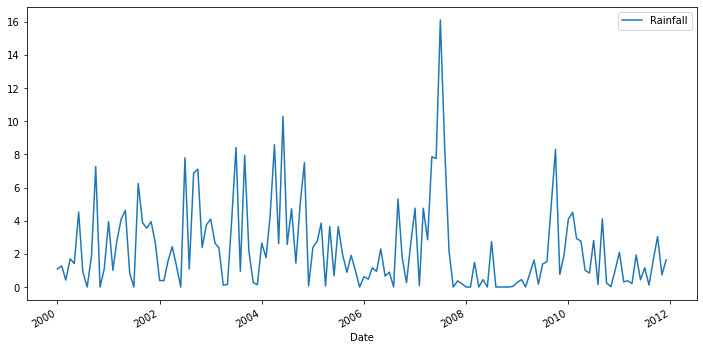

In [4]:
data['Date'] = pd.to_datetime(data['Date']) # convert date column to DateTime
ax = data.plot(x='Date', y='Rainfall', figsize=(12,6))

In [141]:
#Monthly tank depth function, tank depth should never be negative OR above max_height
tank_init = 5.35 #starting height of water in tank
max_height= 13.37 #maximum height of water in tank; anything above this will overflow out of tank
pct_cap=0.98 #average amount of monthly rainfall captured (avg between 90-98%)
monthly_dis=2.46 #average height of water discharged from tank per month (avg between 4000-5200 gallons [2.13-2.78 inches])
overflow_count=0
dry_count=0
def TankRange(existing_tank_depth,monthly_rainfall):
    tank_depth=existing_tank_depth+(monthly_rainfall*pct_cap)-monthly_dis
    if tank_depth < 0:
        tank_depth = 0
        dry_count+=1
    elif tank_depth > max_height:
        tank_depth = max_height
        overflow_count+=1
    else:
        tank_depth = tank_depth
    return tank_depth

In [142]:
import numpy as np
import statistics

def SampleByMonth(month):
    if ( month == 0 ):
        d = data[data.variable == "Jan"]
        return d["Rainfall"].sample()
    if ( month == 1 ):
        d = data[data.variable == "Feb"]
        return d["Rainfall"].sample()
    if ( month == 2 ):
        d = data[data.variable == "Mar"]
        return d["Rainfall"].sample()
    if ( month == 3 ):
        d = data[data.variable == "Apr"]
        return d["Rainfall"].sample()
    if ( month == 4 ):
        d = data[data.variable == "May"]
        return d["Rainfall"].sample()
    if ( month == 5 ):
        d = data[data.variable == "Jun"]
        return d["Rainfall"].sample()
    if ( month == 6 ):
        d = data[data.variable == "Jul"]
        return d["Rainfall"].sample()
    if ( month == 7 ):
        d = data[data.variable == "Aug"]
        return d["Rainfall"].sample()
    if ( month == 8 ):
        d = data[data.variable == "Sep"]
        return d["Rainfall"].sample()
    if ( month == 9 ):
        d = data[data.variable == "Oct"]
        return d["Rainfall"].sample()
    if ( month == 10 ):
        d = data[data.variable == "Nov"]
        return d["Rainfall"].sample()
    if ( month == 11 ):
        d = data[data.variable == "Dec"]
        return d["Rainfall"].sample()

    return 2.356    

# return a random value from our data sample
def DirectSample():
    x = data['Rainfall'].sample()
    return x

rainfallStd = data['Rainfall'].std()
rainfall_mean = data['Rainfall'].mean()

print("sample variance = ")
print(rainfallStd)
print("sample mean = ")
print(rainfall_mean)

num_simulations = 10
num_months = 12
num_years = 3
num_months2=num_months*num_years

#Tank parameters
tank_init = 5.35 #(10000*12/7.48)/3000 starting height of water in tank in inches, converts gallons to inches, 5.35
max_height= 13.37 #(25000*12/7.48)/3000 #maximum height of water in tank; anything above this will overflow out of tank, converts gallons to inches
pct_cap=0.90 #average amount of monthly rainfall captured (min between 90-98%)
monthly_dis=2.78 #(5200*12/7.48)/3000 #min height of water discharged from tank per month (avg between 4000-5200 gallons [2.13-2.78 inches])


print(f'tank init is: {tank_init}, pct cap is: {pct_cap}, monthly discharge is: {monthly_dis}')
simulation_df = pd.DataFrame()
completeSeries = []
overflow_series=[]
dry_series=[]
for x in range(num_simulations):
    count = 0

    
    rainfall_series = []
    tank_depth_series= []
    overflow_count=0
    dry_count=0

    for y in range(num_months2):
        if count == num_months2:
            break
        rainfall = DirectSample()
        completeSeries.append(rainfall.iloc[0])
        rainfall_series.append(rainfall)
        monthly_rainfall=rainfall.iloc[0]
        print("Monthly Rainfall Is")
        print(monthly_rainfall)
        if count == 0:
            print("Tank Depth line 85")
            tank_depth=(tank_init+monthly_rainfall*pct_cap)-monthly_dis
            print(tank_depth)
        if count >0:
                tank_depth=TankRange(tank_depth,monthly_rainfall)
                print("Tank depth line 91")
                print(tank_depth)

        tank_depth_series.append(tank_depth)
        count += 1
        

    simulation_df[x] = rainfall_series
    tank_depth_df=pd.DataFrame(tank_depth_series,columns=["Tank Depth (in.)"])
    overflow_series.append(overflow_count)
    dry_series.append(dry_count)

overflow_df=pd.DataFrame(overflow_series,columns=["Overflow Count"])
dry_df=pd.DataFrame(dry_series,columns=["Dry Count"])

import statistics

#simulation_std = statistics.pstdev(completeSeries)
#simulation_mean = statistics.mean(completeSeries)

print("simulation variance = ")
print(simulation_std)
print("simulation mean = ")
print(simulation_mean)
print(overflow_count)


sample variance = 
2.6255197583629033
sample mean = 
2.356111111111112
tank init is: 5.35, pct cap is: 0.9, monthly discharge is: 2.78
Monthly Rainfall Is
7.11
Tank Depth line 85
8.969
Monthly Rainfall Is
0.07
Tank depth line 91
6.252000000000001
Monthly Rainfall Is
3.55
Tank depth line 91
6.667000000000002
Monthly Rainfall Is
4.52
Tank depth line 91
7.955000000000002
Monthly Rainfall Is
1.92
Tank depth line 91
6.903000000000002
Monthly Rainfall Is
1.67
Tank depth line 91
5.626000000000003
Monthly Rainfall Is
0.0
Tank depth line 91
2.846000000000003
Monthly Rainfall Is
4.51
Tank depth line 91
4.1250000000000036
Monthly Rainfall Is
0.66
Tank depth line 91
1.939000000000004
Monthly Rainfall Is
0.92


UnboundLocalError: local variable 'dry_count' referenced before assignment

In [120]:
tank_depth_df

,Tank Depth (in.)
0,2.804
1,6.999
2,5.263
3,2.483
4,0.000
5,0.910
6,0.470
7,0.000
8,0.000
9,0.000


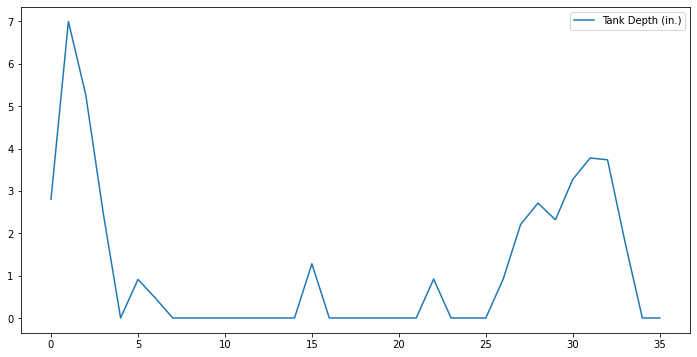

In [121]:
ax = tank_depth_df.plot(y='Tank Depth (in.)', figsize=(12,6))

In [135]:
dry_count=tank_depth_df['Tank Depth (in.)'].value_counts()[0]
max_count=tank_depth_df['Tank Depth (in.)'].value_counts()[max_height]
print(f'/Across the simulation, the tank ran dry {dry_count} times over {num_years} and reached max capacity {max_count} times over {num_years}.')

KeyError: 13.37

In [55]:
rainfall

143    1.64
Name: Rainfall, dtype: float64